
<font color='brown'><h1>Proposal 2: Analyzing and Mitigating Energy
Crises</h1>

<font color='green'><h2>Q3. Why do underdeveloped countries face more frequent and severe energy crises?

<font color='skyblue'><h2>Opening the dataset from google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/Central Class Code /complete_renewable_energy_dataset.csv'

# Load the file
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

     Country  Year Energy Type  Production (GWh)  Installed Capacity (MW)  \
0        USA  2011       Solar      85404.690027              5549.794323   
1  Australia  2008  Geothermal      22205.069382             43211.593798   
2     Canada  2013     Biomass      94102.732038              6139.117212   
3      Japan  2010     Biomass      88771.932910             40323.639260   
4      China  2018       Solar      93288.408581             30755.403056   

   Investments (USD)  Population           GDP  Energy Consumption  \
0       5.604125e+09  1064007213  1.775278e+14       369654.644184   
1       6.361886e+08  1033255852  6.435372e+13       771781.636293   
2       6.158680e+09    14895124  1.567926e+14       342707.152899   
3       8.526116e+09  1448827283  1.350464e+14       498839.574253   
4       5.086237e+09  1499494307  8.677956e+13       819064.362785   

   Energy Exports  ...  Economic Freedom Index  Ease of Doing Business  \
0    93087.198199  ...               49.21

<font color='skyblue'><h2> Filling Null Values if there any

In [ ]:

numeric_cols = data.select_dtypes(include=['number']).columns

# Fill missing values with the average value for each numeric feature within each country
data[numeric_cols] = data.groupby('Country')[numeric_cols].transform(lambda group: group.fillna(group.mean()))

# Display the cleaned data to verify
print(data.head())

     Country  Year Energy Type  Production (GWh)  Installed Capacity (MW)  \
0        USA  2011       Solar      85404.690027              5549.794323   
1  Australia  2008  Geothermal      22205.069382             43211.593798   
2     Canada  2013     Biomass      94102.732038              6139.117212   
3      Japan  2010     Biomass      88771.932910             40323.639260   
4      China  2018       Solar      93288.408581             30755.403056   

   Investments (USD)  Population           GDP  Energy Consumption  \
0       5.604125e+09  1064007213  1.775278e+14       369654.644184   
1       6.361886e+08  1033255852  6.435372e+13       771781.636293   
2       6.158680e+09    14895124  1.567926e+14       342707.152899   
3       8.526116e+09  1448827283  1.350464e+14       498839.574253   
4       5.086237e+09  1499494307  8.677956e+13       819064.362785   

   Energy Exports  ...  Economic Freedom Index  Ease of Doing Business  \
0    93087.198199  ...               49.21

<font color='lime'><h2>Updated Feature Engineering and Score Calculation(Energy Efficiency Score[EES],Development Score[DS] & Catastrophe Score[CS])

<font color='skyblue'><h2>Energy Efficiency Score[EES]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ensure the dataset contains necessary columns
features = ['Energy Consumption', 'Proportion of Energy from Renewables', 'Energy Type']

# Select and normalize these columns to [0, 100] range
scaler = MinMaxScaler(feature_range=(0, 100))
data[['Energy Consumption', 'Proportion of Energy from Renewables']] = scaler.fit_transform(
    data[['Energy Consumption', 'Proportion of Energy from Renewables']]
)

# Define the weights for each feature (adjustable based on relevance)
renewables_weight = 0.7  # Giving Proportion of Energy from Renewables higher importance
consumption_weight = 0.3

# Calculate Energy Efficiency Score (EES) as a weighted sum
data['EES'] = (
    data['Proportion of Energy from Renewables'] * renewables_weight +
    data['Energy Consumption'] * consumption_weight
)

# Group by Energy Type and calculate the average EES for each type
grouped_ees = data.groupby('Energy Type')['EES'].mean().reset_index()

# Display the grouped EES
print(grouped_ees)


  Energy Type        EES
0     Biomass  49.805769
1  Geothermal  49.035307
2       Hydro  50.785868
3       Solar  48.741640
4        Wind  50.065726


<font color='skyblue'><h2>Development Score[DS]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ... (Your previous code to load and preprocess the dataset)

# Select features for Development Score - INCLUDING NEW FEATURES
development_features = [
    'Investments (USD)', 'GDP', 'Energy Exports', 'Energy Imports',
    'R&D Expenditure', 'Number of Research Institutions',
    'Number of Renewable Energy Publications', 'Innovation Index',
    'Urbanization Rate', 'Industrialization Rate'
]

# Create a new DataFrame with only the development features
development_data = data[development_features]

# Scale the features to 0-100 range
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_development_data = scaler.fit_transform(development_data)

# Create a new DataFrame with the scaled features
scaled_development_df = pd.DataFrame(scaled_development_data, columns=development_features, index=data.index)

# Calculate Development Score (average of scaled features)
# Divide by 10 now as we have 10 features
data['Development Score'] = scaled_development_df.mean(axis=1)

# Display the data with the Development Score
print(data[['Country', 'Development Score']].head())



     Country  Development Score
0        USA          63.070751
1  Australia          42.721440
2     Canada          45.381976
3      Japan          56.540582
4      China          49.709350


In [ ]:
# Calculate the mean Development Score for each country per year
mean_ds_per_country_year = data.groupby(['Country', 'Year'])['Development Score'].mean().reset_index()
mean_ds_per_country_year['Development Score'] += 25

# Display the result
print(mean_ds_per_country_year.head())

# Filter for the year 2017
mean_ds_2017 = mean_ds_per_country_year[mean_ds_per_country_year['Year'] == 2017]

# Display the result for unique countries in 2017
print(mean_ds_2017)


     Country  Year  Development Score
0  Australia  2000          75.315041
1  Australia  2001          68.088689
2  Australia  2002          73.516882
3  Australia  2003          74.025462
4  Australia  2004          72.204746
       Country  Year  Development Score
17   Australia  2017          76.957450
41      Brazil  2017          71.126886
65      Canada  2017          69.850947
89       China  2017          75.047108
113     France  2017          72.798928
137    Germany  2017          75.521886
161      India  2017          76.780996
185      Japan  2017          72.585655
209     Russia  2017          79.878195
233        USA  2017          73.587196


In [ ]:
# Calculate the maximum Development Score for each country per year
#max_ds_per_country_year = data.groupby(['Country', 'Year'])['Development Score'].max().reset_index()

# Display the result
#print(max_ds_per_country_year)

# Get the top 5 highest mean Development Score values
top_5_mean_ds = mean_ds_per_country_year.nlargest(5, 'Development Score')

# Display the result
print(top_5_mean_ds)



    Country  Year  Development Score
213  Russia  2021          85.019864
163   India  2019          82.398832
182   Japan  2014          81.952143
196  Russia  2004          81.723605
101  France  2005          81.585484


In [ ]:
# Get the total number of rows in the 'Development Score' column
total_rows = data['Development Score'].shape[0]

# Print the total number of rows
print(f"Total number of rows in Development Score column: {total_rows}")

Total number of rows in Development Score column: 2500


In [ ]:
# Group countries by development level (e.g., first, second, third world) based on Development Score thresholds
def categorize_country(mean_ds_per_country_year):
    if mean_ds_per_country_year >= 75:
        return '1st World'
    elif 50 <= mean_ds_per_country_year < 75:
        return '2nd World'
    else:
        return '3rd World'

data['Country Category'] = data['Development Score'].apply(categorize_country)
print(data['Country Category'].unique())

['2nd World' '3rd World' '1st World']


In [ ]:
# Print 10 countries from each category
for category in ['1st World', '2nd World', '3rd World']:
    countries_in_category = data[data['Country Category'] == category]['Country'].head(10).tolist()
    print(f"{category}: {countries_in_category}")

1st World: ['France', 'Canada', 'Australia', 'Brazil', 'France', 'India', 'Russia', 'Germany', 'India', 'USA']
2nd World: ['USA', 'Japan', 'India', 'Germany', 'Germany', 'Japan', 'France', 'Brazil', 'India', 'Russia']
3rd World: ['Australia', 'Canada', 'China', 'Canada', 'Australia', 'Japan', 'China', 'Japan', 'Canada', 'Canada']


<font color='skyblue'><h2>Catastrophe Score

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ... (Your previous code to load, preprocess, and calculate Development Score)

# Get unique countries
unique_countries = data['Country'].unique()

# Print the unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)

Unique Countries:
USA
Australia
Canada
Japan
China
India
Germany
France
Brazil
Russia


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns for catastrophe score
catastrophe_features = data[['Natural Disasters', 'CO2 Emissions', 'Production (GWh)',
                             'Average Annual Temperature', 'Population']]

# Normalize each feature to a range of 0 to 1 using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(catastrophe_features), columns=catastrophe_features.columns)

# Assign sample weights for each feature
weights = {
    'Natural Disasters': 0.2,
    'CO2 Emissions': 0.3,
    'Production (GWh)': 0.2,
    'Average Annual Temperature': 0.2,
    'Population': 0.1
}

# Apply weights to each normalized feature and calculate the catastrophe score
data['Catastrophe Score'] = (normalized_features * pd.Series(weights)).sum(axis=1) * 100

# Display the results with the calculated Catastrophe Score
print(data[['Country', 'Catastrophe Score']].head())


     Country  Catastrophe Score
0        USA          45.762619
1  Australia          69.832574
2     Canada          29.600655
3      Japan          77.051421
4      China          69.768116


In [ ]:

# Calculate mean Catastrophe Score for each country per year
mean_catastrophe_per_country_year = data.groupby(['Country', 'Year'])['Catastrophe Score'].mean().reset_index()

# Display the results with the mean Catastrophe Score per country per year
print(mean_catastrophe_per_country_year.head())

     Country  Year  Catastrophe Score
0  Australia  2000          55.601438
1  Australia  2001          53.850992
2  Australia  2002          46.900692
3  Australia  2003          49.032133
4  Australia  2004          43.739826


<font color='skyblue'><h2>Analysis Part

<font color='yellow'><h2>Line Chart: Track Energy Efficiency Over Time

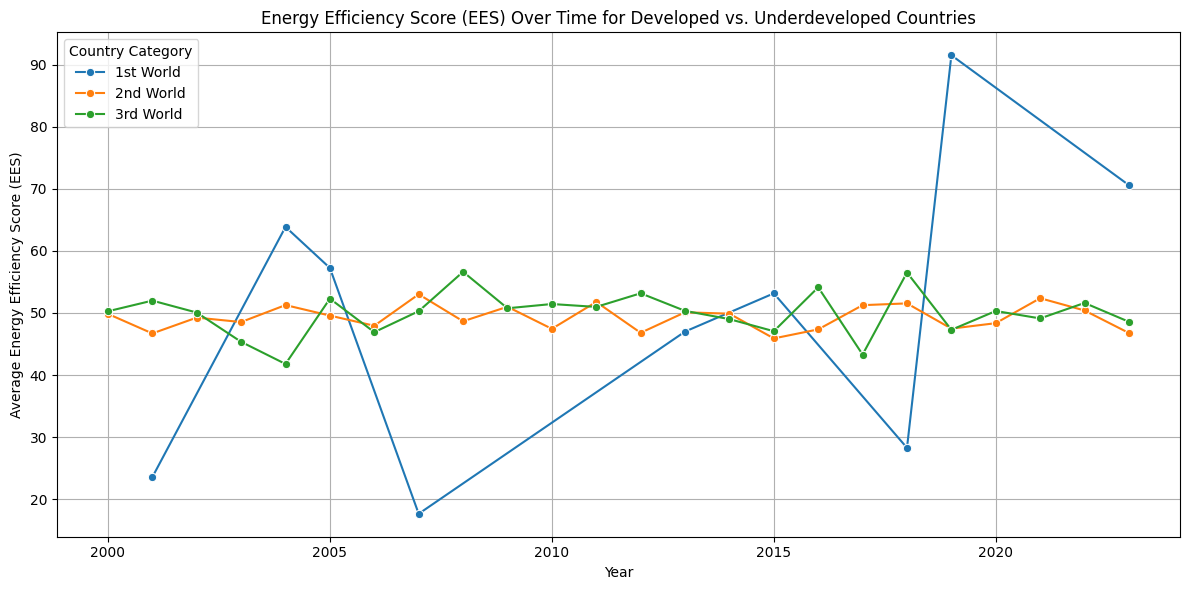

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Country Category' column classifies countries as 'Developed' or 'Underdeveloped'
# and 'Year' column contains the year of each data entry.

# Calculate the yearly average EES by 'Country Category' and 'Year'
average_ees_over_time = data.groupby(['Country Category', 'Year'])['EES'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_ees_over_time, x='Year', y='EES', hue='Country Category', marker='o')
plt.title('Energy Efficiency Score (EES) Over Time for Developed vs. Underdeveloped Countries')
plt.xlabel('Year')
plt.ylabel('Average Energy Efficiency Score (EES)')
plt.legend(title='Country Category')
plt.grid(True)
plt.tight_layout()
plt.show()


<font color='yellow'><h2>Pie Chart: Proportion of Energy from Renewables

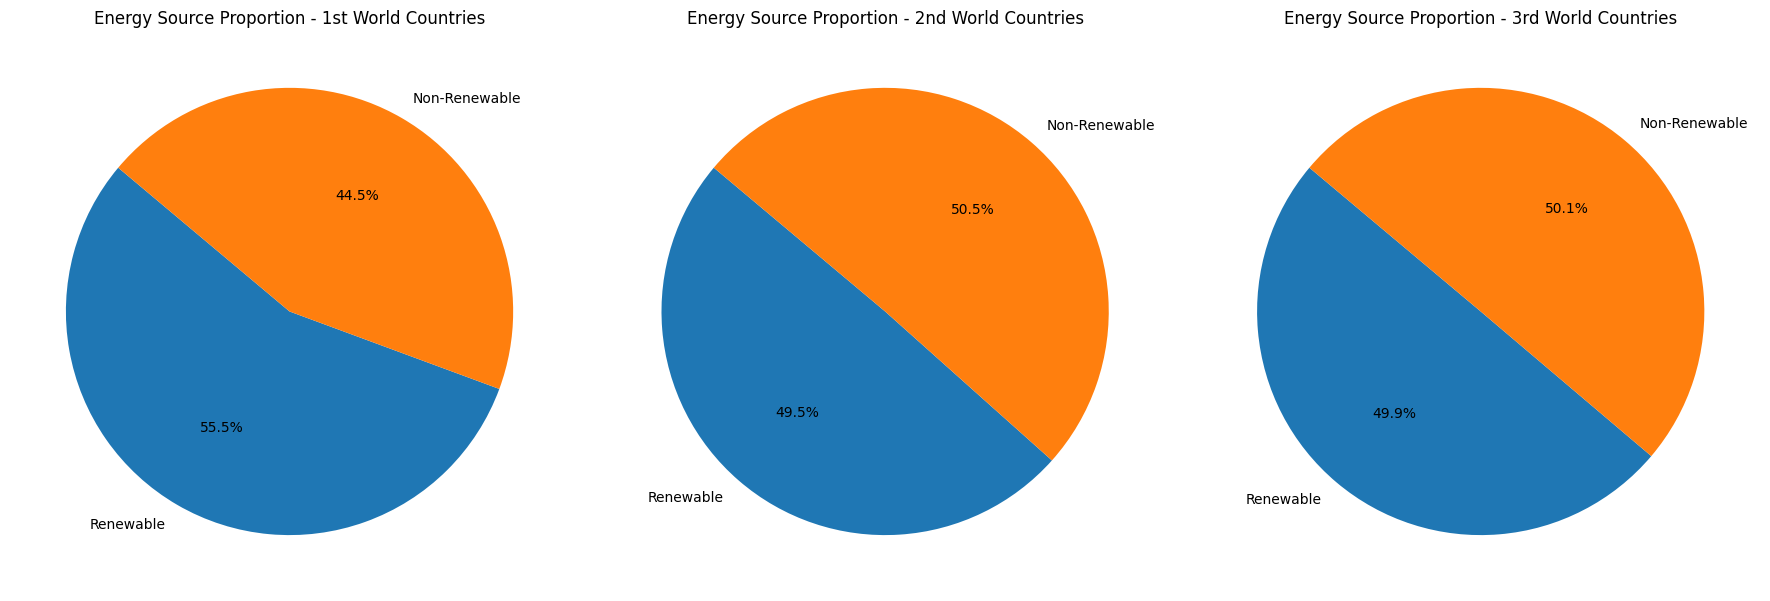

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate non-renewable proportion
data['Non-Renewable Proportion'] = 100 - data['Proportion of Energy from Renewables']

# Calculate the average renewable and non-renewable proportions for each category
category_avg = data.groupby('Country Category')[['Proportion of Energy from Renewables', 'Non-Renewable Proportion']].mean()

# Set up subplots for each category
plt.figure(figsize=(18, 6))

# Loop over each country category to create a pie chart
for i, category in enumerate(category_avg.index):
    plt.subplot(1, 3, i+1)
    plt.pie(
        category_avg.loc[category],
        labels=['Renewable', 'Non-Renewable'],
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Energy Source Proportion - {category} Countries')

plt.tight_layout()
plt.show()


<font color='yellow'><h2>Stacked Bar Chart: Impact of CO₂ Emissions and Catastrophe Score

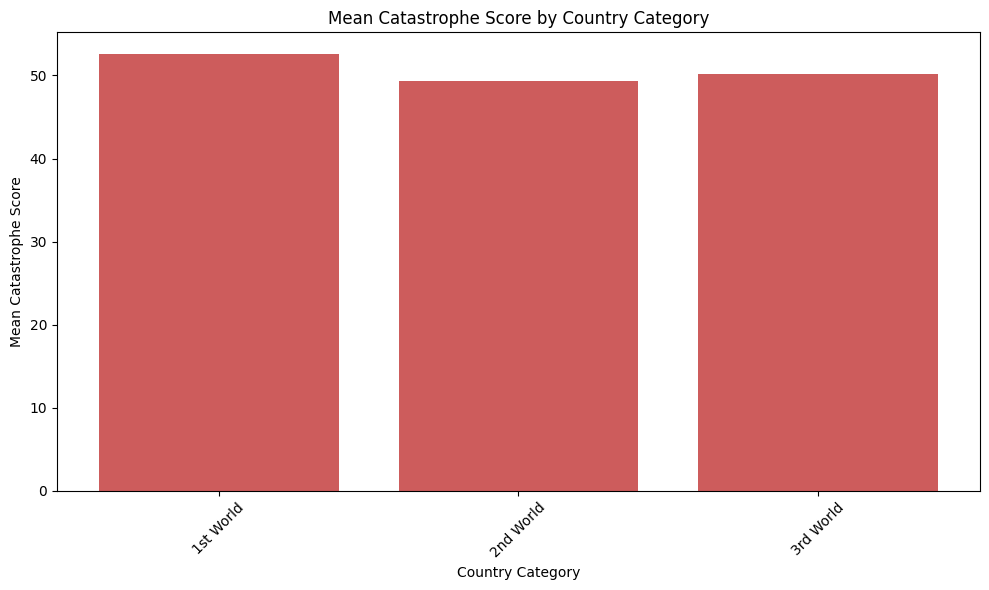

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is the original dataset with the 'Country Category' and 'Catastrophe Score' columns
# Calculate the mean Catastrophe Score per country category
category_impact = data.groupby('Country Category')['Catastrophe Score'].mean().reset_index()

# Plot the bar chart for Catastrophe Score only
plt.figure(figsize=(10, 6))
plt.bar(category_impact['Country Category'], category_impact['Catastrophe Score'], color='indianred')

# Chart formatting
plt.title('Mean Catastrophe Score by Country Category')
plt.xlabel('Country Category')
plt.ylabel('Mean Catastrophe Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


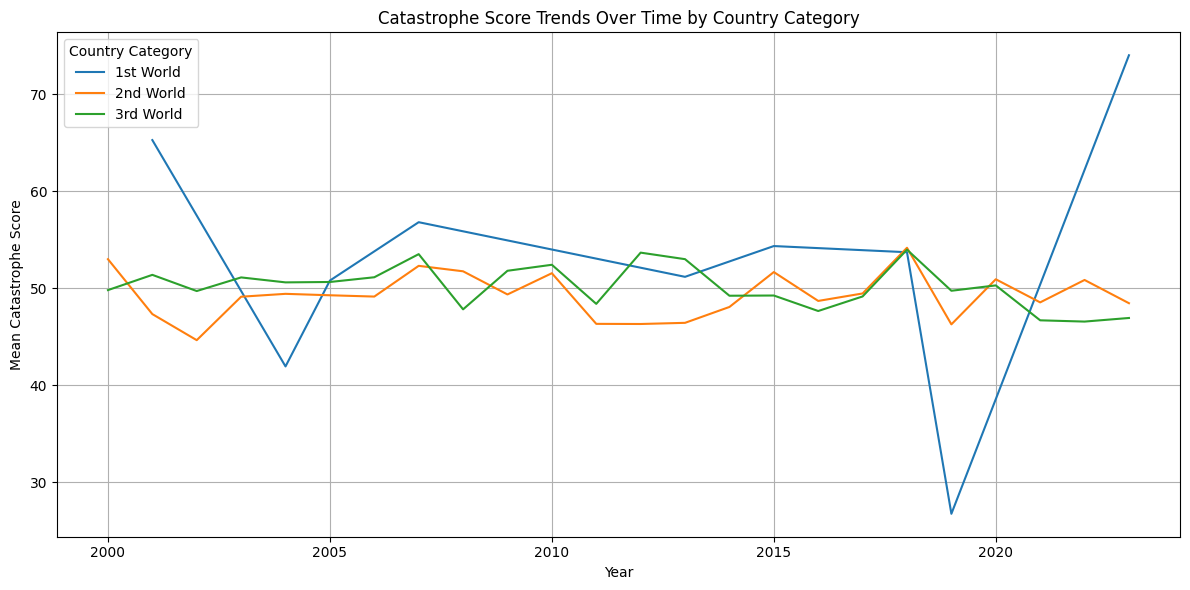

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean Catastrophe Score for each country category by year
category_trend = data.groupby(['Country Category', 'Year'])['Catastrophe Score'].mean().reset_index()

# Plot the trend lines for each country category
plt.figure(figsize=(12, 6))
for category in category_trend['Country Category'].unique():
    subset = category_trend[category_trend['Country Category'] == category]
    plt.plot(subset['Year'], subset['Catastrophe Score'], label=category)

# Formatting the plot
plt.title('Catastrophe Score Trends Over Time by Country Category')
plt.xlabel('Year')
plt.ylabel('Mean Catastrophe Score')
plt.legend(title='Country Category')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


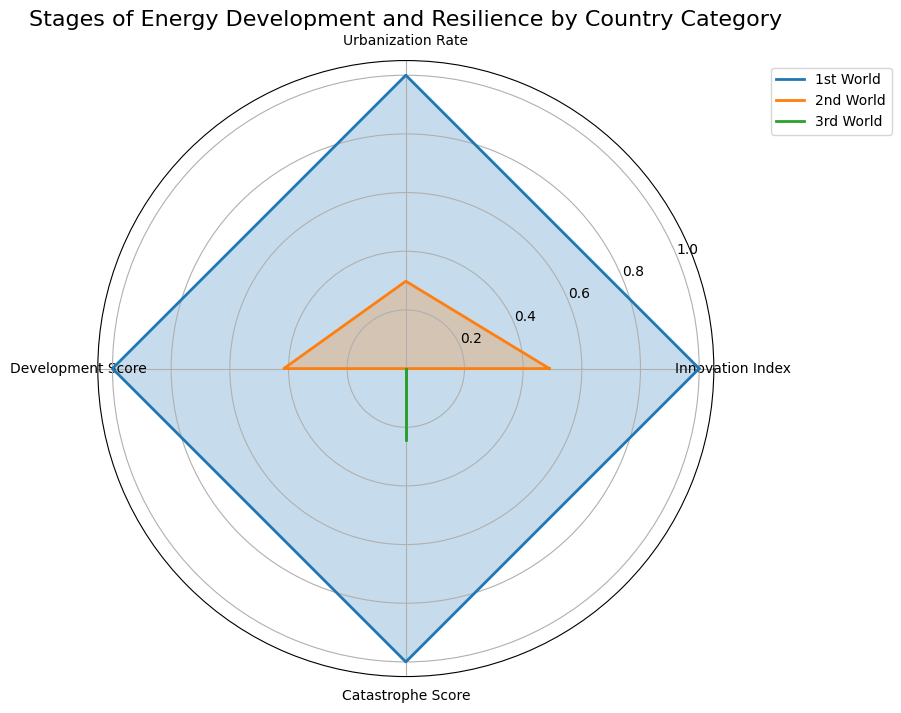

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country categories (1st World, 2nd World, 3rd World)
# and calculate mean values for relevant features
stage_analysis = data.groupby('Country Category').agg({
    'Innovation Index': 'mean',
    'Urbanization Rate': 'mean',
    'Development Score': 'mean',
    'Catastrophe Score': 'mean'
}).reset_index()

# Normalize the scores for a clear comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_stage_analysis = pd.DataFrame(
    scaler.fit_transform(stage_analysis.iloc[:, 1:]),
    columns=stage_analysis.columns[1:],
    index=stage_analysis['Country Category']
)

# Plot a radar/spider chart for the analysis
import numpy as np

# Number of variables
categories = list(normalized_stage_analysis.columns)
N = len(categories)

# Create a radar chart for each country category
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for index, row in normalized_stage_analysis.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=index, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Add labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add a title and legend
ax.set_title('Stages of Energy Development and Resilience by Country Category', size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()
